# !!!!! FIND OTHER DATASOURCE !!!!!

# Python 101
## Part IX.
---
## Dataframes and visualization
### Act I: Use the pandas, Luke!

<img src="pics/pandas.png" align="left">
<br style="clear:left;"/>

In [2]:
import pandas as pd

#### Part I. Basic pandas operations
- read csv data into a pandas dataframe

In [5]:
data = pd.read_csv('./data/vote2014.csv', quotechar='"', delimiter=';', encoding='utf-8')

- show the first 5 rows

In [6]:
data.head()

,region,subregion,subid,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,2,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,3,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,4,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,5,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,6,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


- get a dataframe's column names

In [7]:
data.columns

Index(['region', 'subregion', 'subid', 'name', 'party', 'votes', 'votes %'], dtype='object')

- select a subset of columns

In [8]:
data[['name', 'votes']].head()

,name,votes
0,Szöllősi Istvánné,321
1,Schiffer András,6482
2,Rogán Antal,21503
3,Hegedűs Lóránt Gézáné,3713
4,Kerék-Bárczy Szabolcs,15459


- filter columns by selecting subset of columns

In [9]:
cols_i_want = [col for col in data.columns if not col == 'subid']
cols_i_want

['region', 'subregion', 'name', 'party', 'votes', 'votes %']

In [10]:
data[cols_i_want].head()

,region,subregion,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


__Caution!__ `data[cols]` only creates a view!  
Use `data = data[cols]` if you want on a subset.

In [11]:
data.head()

,region,subregion,subid,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,2,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,3,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,4,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,5,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,6,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


In [12]:
data = data[cols_i_want]
data.head()

,region,subregion,name,party,votes,votes %
0,BUDAPEST,Budapest V.ker.,Szöllősi Istvánné,SZOCIÁLDEMOKRATÁK,321,0.68
1,BUDAPEST,Budapest V.ker.,Schiffer András,LMP,6482,13.65
2,BUDAPEST,Budapest V.ker.,Rogán Antal,FIDESZ-KDNP,21503,45.29
3,BUDAPEST,Budapest V.ker.,Hegedűs Lóránt Gézáné,JOBBIK,3713,7.82
4,BUDAPEST,Budapest V.ker.,Kerék-Bárczy Szabolcs,MSZP-EGYÜTT-DK-PM-MLP,15459,32.56


- use aggregation functions  
_How many people voted?_

In [13]:
data['votes'].sum()

4908608

- group values to get more insight  
_Let's get the sum of the votes for each party!_

In [14]:
data[['party', 'votes']].groupby('party').sum().head(10)

,votes
party,
4K!,1897
A HAZA NEM ELADÓ,23037
A VÁLASZ,239
AQP,363
EGYIKSEM,71
EGYÜTT 2014,6361
EP,1362
EU. ROM,637
EURÓPAI BALOLDAL,390


- ordering dataframes  
_Order results by the number of votes!_

In [15]:
party_votes = (
    data
    [['party', 'votes']]
    .groupby('party')
    .sum()
    .sort_values('votes', ascending=False)
)
party_votes.head()

,votes
party,
FIDESZ-KDNP,2165342
MSZP-EGYÜTT-DK-PM-MLP,1317879
JOBBIK,1000637
LMP,244191
A HAZA NEM ELADÓ,23037


In [16]:
len(data['party'].unique())

54

#### Part II. Plotting results

Use a jupyter "magic" function to draw the plots into the notebook.  
Also load plotting libraries `matplotlib` and `seaborn`.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    try:
        !conda install seaborn
    except:
        print('Shit happens...')

- simple barplot

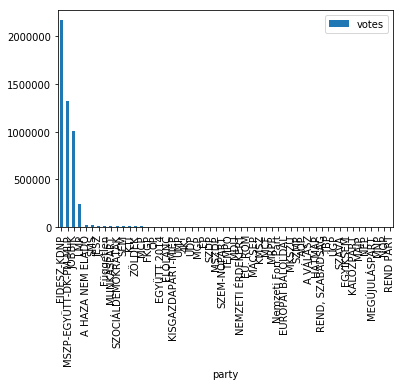

In [19]:
party_votes.plot(kind='bar');

- filtering and plotting  
_Only plot parties with at least 10000 votes!_

We can filter dataframes with the `dataframe[condition]` statement where condition is a logical expression on one (or more) column(s).

In [20]:
condition = party_votes['votes'] > 10000
condition.head(15)

party
FIDESZ-KDNP               True
MSZP-EGYÜTT-DK-PM-MLP     True
JOBBIK                    True
LMP                       True
A HAZA NEM ELADÓ          True
SMS                       True
JESZ                      True
Független                 True
MUNKÁSPÁRT                True
SZOCIÁLDEMOKRATÁK         True
SEM                       True
KTI                       True
ZÖLDEK                   False
MCP                      False
FKGP                     False
Name: votes, dtype: bool

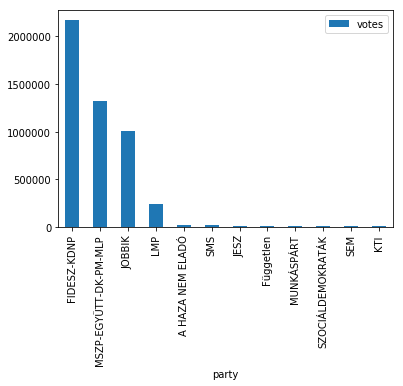

In [22]:
vote10k = party_votes.loc[condition]
vote10k.plot(kind='bar');

_Plot the top 6 party!_

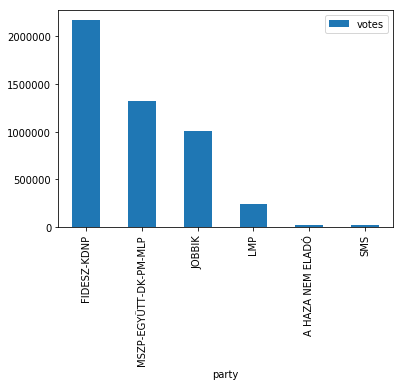

In [23]:
top6 = party_votes.head(6)
top6.plot(kind='bar');

---
### Act III: The devil lies in the details!

<img src="pics/evil-panda.png" width=300 height=300 align="left">
<br style="clear:left;"/>

- Nested grouping operations  
_Consider the regional data too._

In [24]:
regional = (
    data
    [['party', 'region', 'votes']]
    .groupby(['region', 'party'])
    .sum()
)
regional.head(10)

votes
region  party                  
BARANYA A HAZA NEM ELADÓ   1691
        EGYIKSEM             71
        EU. ROM              69
        EURÓPAI BALOLDAL    117
        FIDESZ-KDNP       77456
        FKGP                476
        Független           865
        HATMAP               51
        JESZ                572
        JOBBIK            35528

_Let's only have the ones with more than 5000 votes!_

In [25]:
regional5k = regional.loc[regional.votes > 5000]
regional5k.head(10)

votes
region               party                        
BARANYA              FIDESZ-KDNP             77456
                     JOBBIK                  35528
                     LMP                     11468
                     MSZP-EGYÜTT-DK-PM-MLP   53154
BORSOD–ABAÚJ–ZEMPLÉN FIDESZ-KDNP            124536
                     JOBBIK                  92522
                     LMP                      7823
                     MSZP-EGYÜTT-DK-PM-MLP   81172
BUDAPEST             FIDESZ-KDNP            361888
                     JOBBIK                 108436

- Pivot  
To pivot this dataframe first we need to remove the nested index:

In [26]:
regional5k.reset_index().head()

,region,party,votes
0,BARANYA,FIDESZ-KDNP,77456
1,BARANYA,JOBBIK,35528
2,BARANYA,LMP,11468
3,BARANYA,MSZP-EGYÜTT-DK-PM-MLP,53154
4,BORSOD–ABAÚJ–ZEMPLÉN,FIDESZ-KDNP,124536


Now we can pivot this flattened dataframe:

In [27]:
(regional5k
 .reset_index()
 .pivot(index='region', columns='party', values='votes'))

party,FIDESZ-KDNP,JOBBIK,LMP,MSZP-EGYÜTT-DK-PM-MLP
region,,,,
BARANYA,77456.0,35528.0,11468.0,53154.0
BORSOD–ABAÚJ–ZEMPLÉN,124536.0,92522.0,7823.0,81172.0
BUDAPEST,361888.0,108436.0,73490.0,349890.0
BÁCS–KISKUN,124842.0,50266.0,10021.0,50369.0
BÉKÉS,78410.0,38213.0,6842.0,40202.0
CSONGRÁD,83220.0,39057.0,12537.0,56607.0
FEJÉR,96752.0,46487.0,10099.0,49265.0
GYŐR–MOSON–SOPRON,118018.0,39130.0,11099.0,50600.0
HAJDÚ–BIHAR,116917.0,60668.0,9371.0,51277.0


Set the resulting figure size:

In [28]:
plt.rcParams['figure.figsize'] = 8, 6

Plot the results:

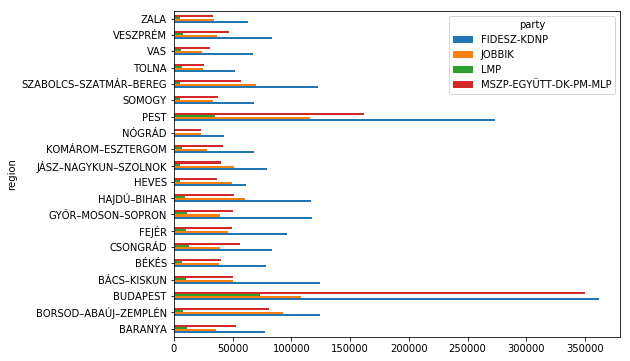

In [29]:
(
    regional5k
    .reset_index()
    .pivot(index='region', columns='party', values='votes')
    .plot(kind='barh')
);

---

## Let's do some...

<img align="left" width=150 src="http://www.reactiongifs.com/r/mgc.gif">

<br style="clear:left;"/>

### Act III: Cool library of the week: <a href="https://mzucker.github.io/2016/09/20/noteshrink.html">noteshrink</a>
#### Export your notes into readable pdfs!

To install:
- install pillow (in your shell execute: `conda install pillow`)
- download and unzip the library (from <a href="https://github.com/mzucker/noteshrink/archive/master.zip">here</a>)
- change line #578 in noteshrink/noteshrink.py: comment out the line
- optional: install with pip: `pip install -e noteshrink`
Then use with:  
`python filename(s) -b output_file_prefix`  
example:

In [ ]:
!python ./noteshrink/noteshrink.py noteshrink/examples/notesA1.jpg noteshrink/examples/notesA2.jpg -b example

<img src="noteshrink/examples/notesA1.jpg" width="300" align="left"><img src="example0000.png" width="300" align="left">

---
## Final Act: The pandas is strong with this one!

<img src="http://2.bp.blogspot.com/-pgK8KdMmSn8/TsFTOwrGk9I/AAAAAAAABAk/5ondVGyw6w8/s320/Darth+Panda.jpg" align="left">

<br style="clear:left;"/>

## It's your turn - write the missing code snippets!

#### 1.  Plot the number of voters in each region!

#### 2. Who would win, if Fidesz doesn't participate in the election?

Hint: You can create filters based on equality. (`~data['party'] == 'FIDESZ-KDNP'`)

#### 3. Who would win by regions, if Fidesz doesn't participate in the election?